### Comparaison des trames dans les coefficients MFCC

In [156]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
from glob import glob
import librosa as lr

In [2]:
#set directory for source files 
data_dir = './scenes_stereo/'

audio_files = glob(data_dir + '*.wav')
print('file size:',len(audio_files))

file size: 100


In [40]:
# Create DataFrame
df = pd.DataFrame(columns=['id', 'audio','freq', 'time'])
for i in range(len(audio_files)):
    audio, freq = lr.load(audio_files[i])
    df = df.append({'id':audio_files[i].split('\\')[1].split('.wav')[0],
                    'audio':audio,
                    'freq': freq,
                    'time': np.arange(0,len(audio))/freq}, ignore_index=True)
    

In [41]:
df.head()

,id,audio,freq,time
0,bus01,"[0.0058410815, 0.010400585, 0.010773442, 0.009...",22050,"[0.0, 4.5351473922902495e-05, 9.07029478458049..."
1,bus02,"[-0.0041992143, -0.0073911683, -0.007949957, -...",22050,"[0.0, 4.5351473922902495e-05, 9.07029478458049..."
2,bus03,"[0.0032270418, 0.003695288, 0.0016324841, -0.0...",22050,"[0.0, 4.5351473922902495e-05, 9.07029478458049..."
3,bus04,"[-0.0067615598, -0.0118648, -0.011875012, -0.0...",22050,"[0.0, 4.5351473922902495e-05, 9.07029478458049..."
4,bus05,"[0.00631936, 0.008699509, 0.0073977686, 0.0081...",22050,"[0.0, 4.5351473922902495e-05, 9.07029478458049..."


In [49]:
# calcul MFCC foreach track and add it to the DataFrame

def MFCC(y,sr):
    return lr.feature.mfcc(y=y,sr=sr)

In [59]:
df['MFCC'] = list(map(MFCC, df['audio'], df['freq']))

In [62]:
df.head()

,id,audio,freq,time,MFCC
0,bus01,"[0.0058410815, 0.010400585, 0.010773442, 0.009...",22050,"[0.0, 4.5351473922902495e-05, 9.07029478458049...","[[-417.67142, -419.6936, -423.21964, -423.4872..."
1,bus02,"[-0.0041992143, -0.0073911683, -0.007949957, -...",22050,"[0.0, 4.5351473922902495e-05, 9.07029478458049...","[[-366.9408, -371.04065, -376.79538, -375.7115..."
2,bus03,"[0.0032270418, 0.003695288, 0.0016324841, -0.0...",22050,"[0.0, 4.5351473922902495e-05, 9.07029478458049...","[[-398.31836, -386.53403, -382.2174, -387.6173..."
3,bus04,"[-0.0067615598, -0.0118648, -0.011875012, -0.0...",22050,"[0.0, 4.5351473922902495e-05, 9.07029478458049...","[[-335.79877, -337.86172, -344.19916, -341.365..."
4,bus05,"[0.00631936, 0.008699509, 0.0073977686, 0.0081...",22050,"[0.0, 4.5351473922902495e-05, 9.07029478458049...","[[-408.09146, -406.6416, -404.4676, -401.52408..."


In [105]:
xsim_euclid = []
xsim_cosine = []
n = 20
for i in range(0,n):
    for j in range(i+1,n):
        xsim_euclid.append(lr.segment.cross_similarity(df['MFCC'][i], df['MFCC'][j],metric='euclidean'))
        xsim_cosine.append(lr.segment.cross_similarity(df['MFCC'][i], df['MFCC'][j],metric='cosine'))

In [150]:
xsim_euclid[0]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Similarity between bus01 and others tracks


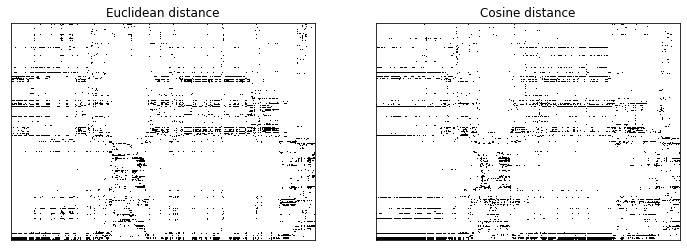

Similarity between bus02 and others tracks


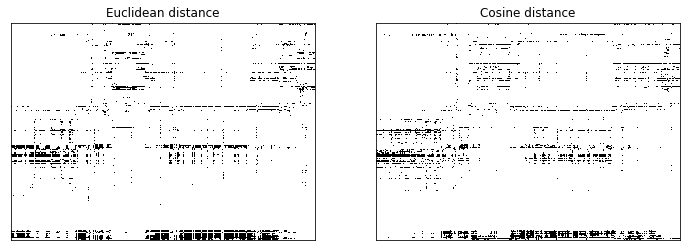

Similarity between bus03 and others tracks


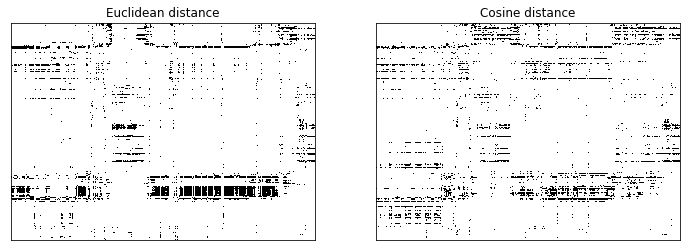

Similarity between bus04 and others tracks


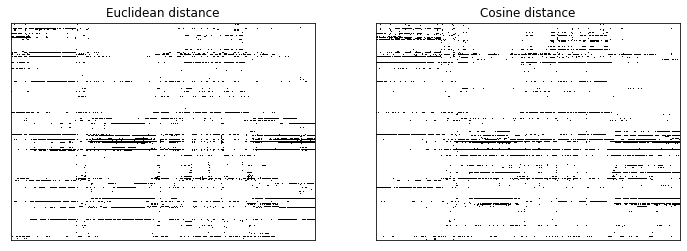

Similarity between bus05 and others tracks


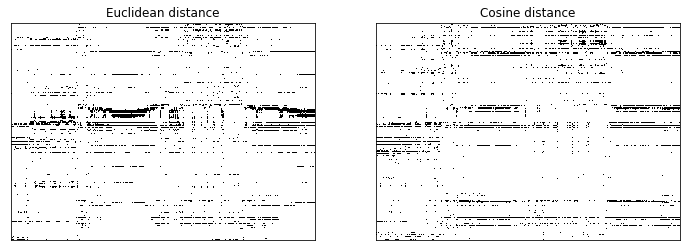

In [183]:
import librosa.display 

# show the similarity between the each of the 5th first bus and others
for i in range(0,5):
    fig = plt.figure(figsize=(12,4))
    print("Similarity between bus0"+str(i+1)+" and others tracks")
    
    plt.subplot(1,2,1)
    librosa.display.specshow(xsim_euclid[i])
    plt.title('Euclidean distance')

    plt.subplot(1,2,2)
    librosa.display.specshow(xsim_cosine[i])
    plt.title('Cosine distance')

    plt.show()
